# Vector store

In [2]:
!pip install -q gensim

In [3]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from collections import defaultdict, namedtuple

In [4]:
# 1. Parameters
VECTOR_SIZE = 100
WINDOW      = 5
MIN_COUNT   = 5
WORKERS     = 4
MAX_WORDS_IN_BATCH = 10000
#MAX_WORDS From https://github.com/piskvorky/gensim/blob/develop/gensim/models/word2vec_inner.pyx#L27

### CustomLineSentence

In [5]:
import itertools
from gensim import utils

class CustomLineSentence:
    def __init__(self, source):
        self.source = source

    def __iter__(self):
        """Iterate through the lines in the source."""
        with utils.open(self.source, 'rb') as fin:
            for line in itertools.islice(fin, None):
                line = utils.to_unicode(line).split()
                i = 0
                while i < len(line):
                    yield line[i: i + MAX_WORDS_IN_BATCH]
                    i += MAX_WORDS_IN_BATCH

In [6]:
# 2. Load the text8 corpus as a stream of sentences
sentences = CustomLineSentence('data/text8')

In [ ]:
class CustomWord2Vec:
     def __init__(self, sentences=None, vector_size=100, window=5, min_count=5, workers=3):

          corpus_iterable = sentences

          self.sentences = sentences
          self.vector_size = vector_size
          self.window = window
          self.min_count = min_count
          self.workers = workers

          # from Word2Vec parameters
          self.shrink_windows=True
          self.compute_loss=False
          self.sorted_vocab=1
          self.null_word=0
          self.epochs=5
          self.hashfxn=hash
          self.cbow_mean=1
          self.ns_exponent=0.75
          self.negayive=5
          self.hs=0
          self.sg=0
          self.min_alpha=0.0001
          self.seed=1
          self.sample=0.001
          self.alpha=0.025
          
          # normal init valuse
          self.train_count = 0
          self.total_train_time = 0
          self.running_training_loss = 0
          self.corpus_count = 0
          self.corpus_total_words = 0

          # Main part build vocab
          self.build_vocab(corpus_iterable=corpus_iterable, corpus_file=None, trim_rule=None)


     def scan_vocab(self, sentences=None, corpus_file=None):
          """Scan the corpus to determine the vocabulary size and word frequencies."""
          if corpus_file:
               sentences = CustomLineSentence(corpus_file) # potentially this could be removed - TODO: test this later

          sentence_no = -1         # start from -1 to count the first sentence as 0 in 
          total_words = 0          # 
          vocab = defaultdict(int)

          for sentence_no, sentence in enumerate(sentences):
            for word in sentence:
                vocab[word] += 1
            total_words += len(sentence)

          corpus_count = sentence_no + 1
          self.raw_vocab = vocab

          return total_words, corpus_count

          def keep_vocab_item(word, count, min_count, trim_rule=None):
               """Should we keep `word` in the vocab or remove it?

               Parameters
               ----------
               word : str
                    Input word.
               count : int
                    Number of times that word appeared in a corpus.
               min_count : int
                    Discard words with frequency smaller than this.
               trim_rule : function, optional
                    Custom function to decide whether to keep or discard this word.
                    If a custom `trim_rule` is not specified, the default behaviour is simply `count >= min_count`.

               Returns
               -------
               bool
                    True if `word` should stay, False otherwise.

               """
               default_res = count >= min_count

               if trim_rule is None:
                    return default_res
               else:
                    rule_res = trim_rule(word, count, min_count)
                    if rule_res == RULE_KEEP:
                         return True
                    elif rule_res == RULE_DISCARD:
                         return False
                    else:
                         return default_res



     def prepare_vocab(
               self, update=False, keep_raw_vocab=False, trim_rule=None
          ):

          min_count = min_count or self.min_count
          sample = sample or self.sample
          drop_total = drop_unique = 0

          # set effective_min_count to min_count in case max_final_vocab isn't set
          self.effective_min_count = min_count

          if not update:
               retain_total, retain_words = 0, []


               for word, v in self.raw_vocab.items():
                    if keep_vocab_item(word, v, self.effective_min_count, trim_rule=trim_rule):
                         retain_words.append(word)
                         retain_total += v
                         if not dry_run:
                         self.wv.key_to_index[word] = len(self.wv.index_to_key)
                         self.wv.index_to_key.append(word)
                    else:
                         drop_unique += 1
                         drop_total += v
              

     def build_vocab(self, corpus_iterable, corpus_file=None, trim_rule=None, progress_per=10000):
          # part 1
          
          total_words, corpus_count = self.scan_vocab(sentences=corpus_iterable, corpus_file=corpus_file)
          print(f"Total words: {total_words}, Corpus count: {corpus_count}")
          self.corpus_count = corpus_count
          self.corpus_total_words = total_words
          
          # part 2 

          report_values = self.prepare_vocab()



     def train():
          pass
          


IndentationError: expected an indented block after 'if' statement on line 78 (1701603869.py, line 79)

In [ ]:
model = CustomWord2Vec(
    sentences,
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS
)

NameError: name 'CustomWord2Vec' is not defined

In [8]:

# 3. Train Word2Vec
model = Word2Vec(
    sentences,
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS
)

# 4. Save the trained model
model.save('models/text8_w2v_100d.model')

# 5. Quick sanity check
print(model.wv.most_similar('king', topn=10))

hello im here 1
hello im here
corpus_count 1701 total_words 17005207
hello im here
prepare vocab
im not updating
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping here
hello looping

KeyboardInterrupt: 

# We want to use PCA, WHY.

PCA (Principal Component Analysis) is used to reduce the dimensionality of high-dimensional data, such as embeddings, while preserving as much of the original information (variance) as possible.

We are going to give it `n_components=3` to reduce the embeddings to 3 dimensions.

In my test case, we just test the first 100 words.

Also, what I can see when I look at the data is that we have a lot of words that are stopwords. We are going to want to remove them.

(71290, 100)


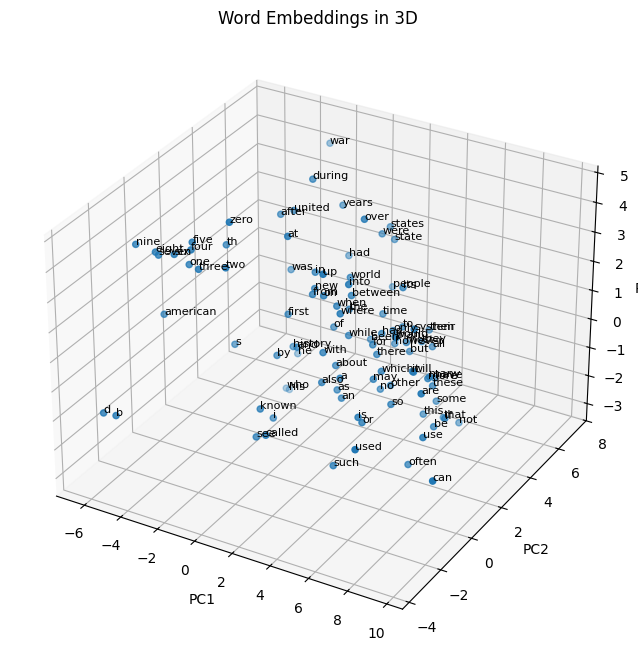

In [ ]:
from sklearn.decomposition import PCA

weights = model.wv.vectors

print(weights.shape)  # (number of words, vector size)
import matplotlib.pyplot as plt

# Reduce vectors to 3D
pca = PCA(n_components=3)
weights_3d = pca.fit_transform(weights)

# Plot the first 100 words in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights_3d[:100, 0], weights_3d[:100, 1], weights_3d[:100, 2])

# Annotate points with words
words = list(model.wv.index_to_key)
for i in range(100):
    ax.text(weights_3d[i, 0], weights_3d[i, 1], weights_3d[i, 2], words[i], size=8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Word Embeddings in 3D')
plt.show()
